In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
!ls drive

MyDrive


In [ ]:
#pip install --upgrade pip

In [ ]:
#pip install tensorflow

In [ ]:
import keras as keras
print(keras.__version__)

2.8.0


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
#!pip install tensorflow==2.8.2

In [ ]:
#!pip install tensorflow>2.8.2

In [ ]:
#!pip install keras==2.8.0

In [ ]:
#!pip install keras==2.9.0

In [ ]:
!pip install opencv-python
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras import backend as K
K.set_image_data_format('channels_last')
#K.set_image_dim_ordering('th')
#from keras.layers import Merge
from keras.applications.vgg16 import VGG16
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import LSTM
from keras.layers.convolutional import Convolution2D, MaxPooling2D
#from keras.optimizers import SGD,RMSprop,adam
import glob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#PATH = os.getcwd()
#data_path ='/Users/macbook/Documents/DeepLearning/DL09Paper/ImageSet'
#print(data_path)
#data_dir_list = os.listdir(data_path)

Given Dataset Path

In [ ]:
#import os,cv2

In [ ]:
PATH = os.getcwd()
# Define data path
data_path = '//content/drive/MyDrive/Deep Learning Course/Final exam dataset'
 
data_dir_list = os.listdir(data_path)

In [ ]:
#import numpy as np

In [ ]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=2
no_images=0

for dataset in data_dir_list:
    img_list = os.listdir(data_path + '/' + dataset)
    no_images = no_images+len(img_list)

# Define the number of classes
labels = np.ones((no_images,),dtype='int64')
num_classes = 8
label_index=0
img_data_list=[]
img=0

for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img)
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        if dataset[0]==  '0':
            labels[label_index]=  0
            #print(dataset[0])
        if dataset[0] == '1':
            labels[label_index] = 1
            #print(dataset[0])
        if dataset[0] == '2':
            labels[label_index] = 2
        if dataset[0]==  '3':
            labels[label_index]=  3
            #print(dataset[0])
        if dataset[0] == '4':
            labels[label_index] = 4
            #print(dataset[0])
        if dataset[0] == '5':
            labels[label_index] = 5
        if dataset[0]==  '6':
            labels[label_index]=  6
            #print(dataset[0])
        if dataset[0] == '7':
            labels[label_index] = 7
            #print(dataset[0])
        label_index = label_index+1
            #print(dataset[0])

Loaded the images of dataset-1-BCC

Loaded the images of dataset-0-AK

Loaded the images of dataset-5-NV

Loaded the images of dataset-2-BKL

Loaded the images of dataset-6-SCC

Loaded the images of dataset-4-MEL

Loaded the images of dataset-3-DF

Loaded the images of dataset-7-VASC



Data points are flatten and image shape

In [ ]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(1397, 128, 128, 3)


In [ ]:
#from keras.utils import np_utils

In [ ]:
# Assigning Labels
import sklearn
# Define the number of classes
num_classes = 8

names = ['AK','BCC','BKL','DF','MEL','NV','SCC','VASC']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

#Shuffle the dataset with random state=2
x,y = img_data,Y
# Split the dataset with 20% testing data
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
X_train.shape

(977, 128, 128, 3)

In [ ]:
X_test.shape

(420, 128, 128, 3)

In [ ]:
y_train.shape

(977, 8)

In [ ]:
y_test.shape

(420, 8)

In [ ]:
print (img_data.shape)

(1397, 128, 128, 3)


IMAGE  augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train)

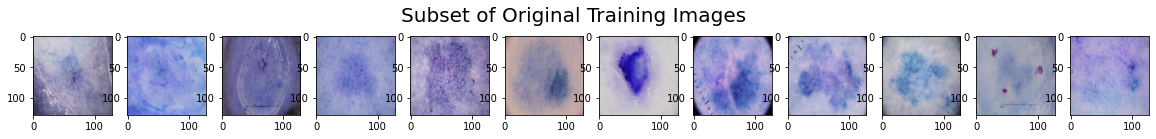

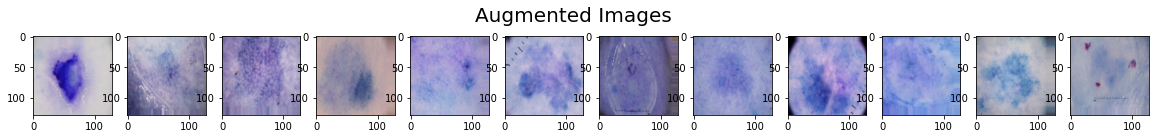

In [ ]:
import matplotlib.pyplot as plt

# take subset of training data
X_train_subset = X_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(X_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(X_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(X_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

Defineing Model

In [ ]:
# Defining the model 
from keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Input
from keras import layers,models
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

#using VGG16 
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
base_model.trainable = False

flatten = layers.Flatten()
dense_layer0 = layers.Dense(200,activation='relu')
dense_layer1 = layers.Dense(100,activation='relu')
prediction_layer = layers.Dense(8,activation='softmax')


model = models.Sequential([base_model,flatten,dense_layer0,dense_layer1,prediction_layer])
#model.add(Flatten())
# Viewing model_configuration
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape
model.layers[0].output_shape
model.layers[0].output
model.layers[0].get_weights()

58900480/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 200)               1638600   
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 8)                 808       
                                                                 
Total params: 16,374,196
Trainable params: 1,659,508
Non-trainable params: 14,714,688
_____________________________________

[array([[[[ 4.29470569e-01,  1.17273867e-01,  3.40129584e-02, ...,
           -1.32241577e-01, -5.33475243e-02,  7.57738389e-03],
          [ 5.50379455e-01,  2.08774377e-02,  9.88311544e-02, ...,
           -8.48205537e-02, -5.11389151e-02,  3.74943428e-02],
          [ 4.80015397e-01, -1.72696680e-01,  3.75577137e-02, ...,
           -1.27135560e-01, -5.02991639e-02,  3.48965675e-02]],
 
         [[ 3.73466998e-01,  1.62062630e-01,  1.70863140e-03, ...,
           -1.48207128e-01, -2.35300660e-01, -6.30356818e-02],
          [ 4.40074533e-01,  4.73412387e-02,  5.13819456e-02, ...,
           -9.88498852e-02, -2.96195745e-01, -7.04357103e-02],
          [ 4.08547401e-01, -1.70375049e-01, -4.96297423e-03, ...,
           -1.22360572e-01, -2.76450396e-01, -3.90796512e-02]],
 
         [[-6.13601133e-02,  1.35693997e-01, -1.15694344e-01, ...,
           -1.40158370e-01, -3.77666801e-01, -3.00509870e-01],
          [-8.13870355e-02,  4.18543853e-02, -1.01763301e-01, ...,
           -9.431

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
# Train and fit wit appropiate batch size, epochs, verbose = 1 and validation set
#model.fit(X_train,y_train,batch_size=64,epochs=2)
#from keras.optimizers import Adam
learning_rate = 0.0001
opt = Adam(lr=learning_rate)
model.compile(optimizer=opt,loss= 'binary_crossentropy',metrics=['accuracy'])
 
model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=1)
hist=model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
8/8 [==============================] - 168s 20s/step - loss: 0.1021 - accuracy: 0.8936
Epoch 2/20
8/8 [==============================] - 166s 20s/step - loss: 0.1005 - accuracy: 0.8905
Epoch 3/20
8/8 [==============================] - 162s 20s/step - loss: 0.0989 - accuracy: 0.8874
Epoch 4/20
8/8 [==============================] - 162s 20s/step - loss: 0.0955 - accuracy: 0.8925
Epoch 5/20
8/8 [==============================] - 162s 20s/step - loss: 0.0943 - accuracy: 0.8956
Epoch 6/20
8/8 [==============================] - 165s 20s/step - loss: 0.0927 - accuracy: 0.8976
Epoch 7/20
8/8 [==============================] - 169s 21s/step - loss: 0.0910 - accuracy: 0.9028
Epoch 8/20
8/8 [==============================] - 163s 20s/step - loss: 0.0899 - accuracy: 0.9048
Epoch 9/20
8/8 [==============================] - 163s 20s/step - loss: 0.0887 - accuracy: 0.9089
Epoch 10/20
8/8 [==============================] - 165s 20s/step - loss: 0.0876 - accuracy: 0.9079
Epoch 11/20
8/8 [==

In [ ]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
score = model.evaluate(X_test,y_test,batch_size=128)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 69s 16s/step - loss: 0.2088 - accuracy: 0.6905
Test Loss: 0.2087704986333847
Test accuracy: 0.6904761791229248


[[9.680e-01 5.832e-03 3.324e-04 ... 5.946e-04 1.607e-02 4.096e-03]
 [5.662e-02 1.005e-01 1.902e-04 ... 4.696e-03 5.727e-01 1.054e-03]
 [2.835e-02 1.983e-01 3.083e-01 ... 7.574e-02 5.068e-03 2.162e-01]
 ...
 [3.351e-06 1.229e-03 9.966e-01 ... 4.883e-04 3.953e-06 1.583e-03]
 [1.758e-08 3.272e-08 4.810e-08 ... 1.000e+00 2.034e-07 1.154e-08]
 [5.477e-01 1.213e-01 2.832e-02 ... 2.713e-02 1.614e-01 3.472e-02]]
[0 6 2 6 5 2 2 7 7 6 1 2 7 5 5 5 5 1 5 5 2 3 3 6 5 5 2 1 2 6 7 3 1 1 2 6 5
 7 0 4 1 0 7 0 0 5 1 3 5 5 0 5 2 1 1 1 2 1 5 1 2 6 2 3 2 2 1 3 7 5 1 7 0 4
 2 4 2 2 0 3 1 5 0 1 6 7 0 1 5 6 1 1 5 4 2 1 2 4 2 4 7 5 3 0 2 1 3 2 4 5 0
 5 7 3 0 5 0 5 1 1 5 4 7 0 1 1 4 0 0 4 1 4 5 7 5 2 4 5 2 1 5 1 7 5 2 5 5 2
 0 3 2 5 2 0 1 7 5 6 2 1 5 0 1 2 1 5 0 1 6 1 0 4 5 2 2 0 7 0 1 4 2 5 0 5 2
 1 7 1 5 6 4 2 7 1 3 7 3 1 2 1 5 1 4 0 0 5 5 7 5 5 0 5 7 6 3 0 1 1 7 0 4 2
 2 7 6 0 5 1 2 2 4 7 5 6 2 0 6 3 1 7 4 2 0 6 2 7 2 0 0 7 1 6 2 4 4 0 1 1 4
 1 5 1 0 1 6 2 1 6 6 5 2 0 4 1 7 2 2 5 3 1 1 0 5 0 4 2 6 1 1 4 4 0 

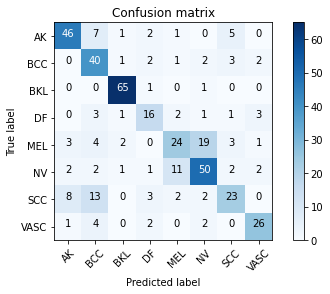

In [ ]:
# Predict model on Test Data

Y_pred = model.predict(X_test)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)

target_names = ['AK','BCC','BKL','DF','MEL','NV','SCC','VASC']
                                        
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=3)

plt.figure()

# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()

MODEL summary is VVG16

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

Used  CCN Algorithum

In [114]:
def evaluate_this_model(model):
    
    np.random.seed(1)

    history = model.fit(X_train, y_train,epochs=20,verbose=True)
    results = model.evaluate(X_test, y_test)
    
    plt.plot(np.squeeze(history.history["loss"]))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
    print("\nAccuracy on test set is {}".format(results[1]))

In [115]:
model = Sequential()
model.add(Convolution2D(filters=10, kernel_size= 3,padding= 'same', activation = 'relu' , input_shape = (128, 128, 3) ))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(Convolution2D(filters=20 , kernel_size= 3,padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Convolution2D(filters=40, kernel_size= 3,padding= 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(200, activation= 'relu'))
model.add(Dense(100, activation= 'relu'))
model.add(Dense(8, activation= 'softmax'))
#build your convnet here to achieve testing accuracy of around 90%

In [116]:
learning_rate = 0.0001
opt = Adam(lr=learning_rate)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [117]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 20)        1820      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 40)        7240      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 40)      

Epoch 1/20
31/31 [==============================] - 12s 378ms/step - loss: 0.5249 - accuracy: 0.1474
Epoch 2/20
31/31 [==============================] - 12s 379ms/step - loss: 0.3794 - accuracy: 0.1556
Epoch 3/20
31/31 [==============================] - 12s 376ms/step - loss: 0.3704 - accuracy: 0.2528
Epoch 4/20
31/31 [==============================] - 12s 378ms/step - loss: 0.3607 - accuracy: 0.2764
Epoch 5/20
31/31 [==============================] - 12s 381ms/step - loss: 0.3431 - accuracy: 0.3060
Epoch 6/20
31/31 [==============================] - 13s 427ms/step - loss: 0.3167 - accuracy: 0.4156
Epoch 7/20
31/31 [==============================] - 13s 394ms/step - loss: 0.2956 - accuracy: 0.4442
Epoch 8/20
31/31 [==============================] - 12s 384ms/step - loss: 0.2866 - accuracy: 0.4657
Epoch 9/20
31/31 [==============================] - 12s 386ms/step - loss: 0.2764 - accuracy: 0.4698
Epoch 10/20
31/31 [==============================] - 12s 387ms/step - loss: 0.2690 - accura

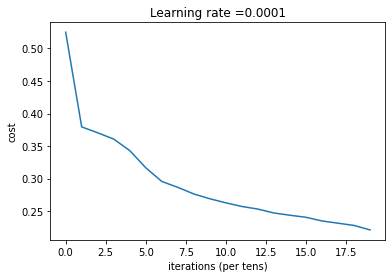



Accuracy on training set is 0.6161719560623169

Accuracy on test set is 0.5666666626930237


In [118]:

evaluate_this_model(model)

In [119]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 10)      280       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 20)        1820      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 20)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 40)        7240      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 40)      

[[3.124e-01 9.193e-02 5.108e-04 ... 2.932e-02 1.759e-01 5.274e-02]
 [1.406e-01 1.518e-01 5.298e-01 ... 1.370e-03 4.313e-02 2.091e-03]
 [2.637e-01 1.144e-01 6.000e-03 ... 2.174e-03 1.680e-01 4.540e-02]
 ...
 [1.057e-01 1.016e-01 5.607e-01 ... 7.093e-03 1.785e-02 1.244e-03]
 [1.006e-02 2.594e-03 1.745e-04 ... 4.498e-01 1.505e-03 8.073e-04]
 [1.539e-01 1.034e-01 5.395e-03 ... 5.925e-02 2.904e-01 4.795e-02]]
[3 2 3 3 5 1 2 7 7 3 1 2 7 5 5 5 5 0 5 4 2 0 3 1 4 5 2 0 2 0 7 6 2 6 2 0 4
 7 0 2 1 0 7 0 1 5 1 5 5 5 0 4 2 1 5 0 2 7 4 0 2 6 2 1 2 2 0 0 7 5 1 5 0 5
 2 4 2 2 4 3 4 5 0 2 5 7 1 0 7 5 1 4 5 4 2 6 2 5 2 5 7 4 3 2 2 7 3 2 4 5 3
 5 4 7 0 4 0 5 6 2 5 4 5 2 6 0 4 0 7 7 1 4 5 7 5 2 4 5 2 6 4 1 7 4 2 3 4 2
 6 0 4 5 2 0 0 7 5 1 2 1 7 0 0 3 0 3 0 4 1 6 0 5 5 4 2 0 7 0 0 5 2 4 0 4 2
 1 1 6 7 6 4 4 7 7 5 7 3 0 2 2 5 3 4 4 0 4 5 7 4 5 0 4 6 4 3 3 6 3 4 4 0 2
 2 0 6 0 6 1 2 2 5 7 4 0 2 0 1 2 1 5 4 2 0 0 2 7 0 4 0 7 1 7 2 4 0 6 6 6 4
 1 5 0 6 6 0 4 1 7 6 5 2 5 4 7 7 2 2 4 3 2 1 1 4 0 4 2 3 1 1 5 4 0 

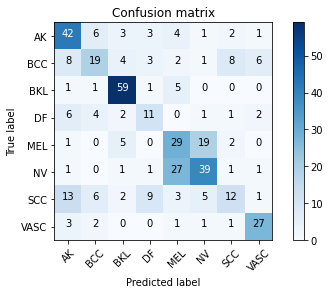

In [120]:
# Predict model on Test Data

Y_pred = model.predict(X_test)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
y_pred = np.argmax(Y_pred,axis=1)
print(y_pred)

target_names = ['AK','BCC','BKL','DF','MEL','NV','SCC','VASC']
                                        
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=3)

plt.figure()

# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()